# Housing Price Prediction

### Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
#Pull data sets from repo
df_train = pd.read_csv("https://raw.githubusercontent.com/mruhlman7/ML-Housing-Price-Prediction/main/Data/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/mruhlman7/ML-Housing-Price-Prediction/main/Data/test.csv")

In [2]:
df_train.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

### Create heatmap using seaborn library

<AxesSubplot:>

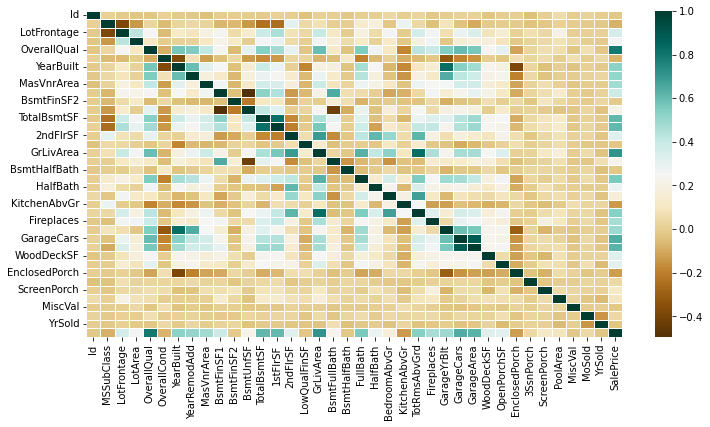

In [3]:
# Using a heatmap helps show the correlation of different features
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.corr(),
           cmap = 'BrBG',
           linewidths = 1,
           )

## Preprocessing

### Handling Missing Values

In [4]:
# Function to Replace Missing Values
    
def cleaning(df, train = True):
    
    # If the df is for training, we want to set "Y" as the Sale Price and drop it from the df
    if train == True:
        ids = df['Id']
        df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())
        Y = df['SalePrice']
        df = df.drop(columns=['Id', 'SalePrice'])
    
    # If the df is for testing, we want to drop only the Id
    else:
        ids = df['Id']
        df = df.drop(columns=['Id'])
    
    # For each feature, we want to designate a value if one is missing
    df['LotFrontage'] = df['LotFrontage'].fillna(0)
    df['Alley'] = df['Alley'].fillna('No Alley')
    df['MasVnrType'] = df['MasVnrType'].fillna('None')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    df['BsmtQual'] = df['BsmtQual'].fillna('None')
    df['BsmtCond'] = df['BsmtCond'].fillna('None')
    df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
    df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
    df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
    df['Electrical'] = df['Electrical'].fillna('SBrkr')
    df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
    df['GarageType'] = df['GarageType'].fillna('None')
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(1999)
    df['GarageFinish'] = df['GarageFinish'].fillna('None')
    df['GarageQual'] = df['GarageQual'].fillna('None')
    df['GarageCond'] = df['GarageCond'].fillna('None')
    df['PoolQC'] = df['PoolQC'].fillna('None')
    df['Fence'] = df['Fence'].fillna('None')
    df['MiscFeature'] = df['MiscFeature'].fillna('None')
    df['MSZoning'] = df['MSZoning'].fillna('RL')
    df['Utilities'] = df['Utilities'].fillna('AllPub')
    df['Exterior1st'] = df['Exterior1st'].fillna('VinylSd') 
    df['Exterior2nd'] = df['Exterior2nd'].fillna('VinylSd') 
    df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0) 
    df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
    df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
    df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
    df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
    df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
    df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
    df['KitchenQual'] = df['KitchenQual'].fillna('TA')
    df['Functional'] = df['Functional'].fillna('Typ')
    df['Functional'] = df['Functional'].fillna('Typ')
    df['GarageCars'] = df['GarageCars'].fillna(0)
    df['GarageArea'] = df['GarageArea'].fillna(0) 
    df['SaleType'] = df['SaleType'].fillna('WD')
    
    # convert all integer data types to object data types
    df['YearBuilt'] = df['YearBuilt'].astype('object')
    df['YearRemodAdd'] = df['YearRemodAdd'].astype('object')
    df['GarageYrBlt'] = df['GarageYrBlt'].astype('object')
    df['YrSold'] = df['YrSold'].astype('object')

    if train == True:
        return df, Y, ids
    else:
        return df, ids

In [5]:
X, Y, train_id = cleaning(df_train, train = True)
X_test, test_id = cleaning(df_test, train = False)

### Ensure all NA values are dropped

In [6]:
missing_train = X.isnull().sum().sum()
missing_test = X_test.isnull().sum().sum()

print ('Number of Missing Values in Training Data: %(missing_train)d'%{"missing_train": missing_train})
print ('Number of Missing Values in Test Data: %(missing_test)d'%{"missing_test":missing_test})

Number of Missing Values in Training Data: 0
Number of Missing Values in Test Data: 0


### Set Up Encoding, Standardization, and Model Pipelines

In [7]:
# Identify categorical and numeric columns
cat = X.select_dtypes(include=['object', 'category']).columns.tolist()
num = X.select_dtypes(include=['number']).columns.tolist()

In [8]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.log1p(X)

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

preprocessor = ColumnTransformer(
    transformers=[
        ('logtransform', LogTransformer(), num),
        ('standardize', StandardScaler(), num), 
        ('onehotencode', OneHotEncoder(handle_unknown='ignore'), cat),
    ])

RFR_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=24))
])

SVM_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', svm.SVR())
])

Ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

### Split Data into Test & Train Sets

In [10]:
#train-test-split with test to train ratio of 20:80
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.25, random_state=24)

Y_train = np.log(Y_train)
Y_validation = np.log(Y_validation)

### Initial Model Fitting

In [11]:
##########################################################################
# Random Forest Regression model
##########################################################################

# Initial RFR fit
RFR_tuner = RFR_pipeline

RFR_tuner.fit(X_train, Y_train)
Y_pred_train = RFR_tuner.predict(X_train)
Y_pred_valid = RFR_tuner.predict(X_validation)

##########################################################################
# Linear Support Vector Machine model
##########################################################################

# Initial SVM fit
SVM_tuner = SVM_pipeline

SVM_tuner.fit(X_train, Y_train)
Y_pred_train = SVM_tuner.predict(X_train)
Y_pred_valid = SVM_tuner.predict(X_validation)

##########################################################################
# Ridge Regression model
##########################################################################

# Initial Ridge fit
Ridge_tuner = Ridge_pipeline

Ridge_tuner.fit(X_train, Y_train)
Y_pred_train = Ridge_tuner.predict(X_train)
Y_pred_valid = Ridge_tuner.predict(X_validation)


### Initial Model Results

In [12]:
trainAcc = []
testAcc = []

validation_score = RFR_tuner.score(X_validation, Y_validation)
train_score = RFR_tuner.score(X_train, Y_train)
testAcc.append(validation_score)
trainAcc.append(train_score)

validation_score = SVM_tuner.score(X_validation, Y_validation)
train_score = SVM_tuner.score(X_train, Y_train)
testAcc.append(validation_score)
trainAcc.append(train_score)

validation_score = Ridge_tuner.score(X_validation, Y_validation)
train_score = Ridge_tuner.score(X_train, Y_train)
testAcc.append(validation_score)
trainAcc.append(train_score)

Training score random forest:  0.9809040113855726
Validation score random forest:  0.8783287247539988
Training score SVM:  0.9374287219594103
Validation score SVM:  0.9004121476641523
Training score Ridge:  0.960499888511755
Validation score Ridge:  0.8970918296439649


Text(0, 0.5, 'Accuracy')

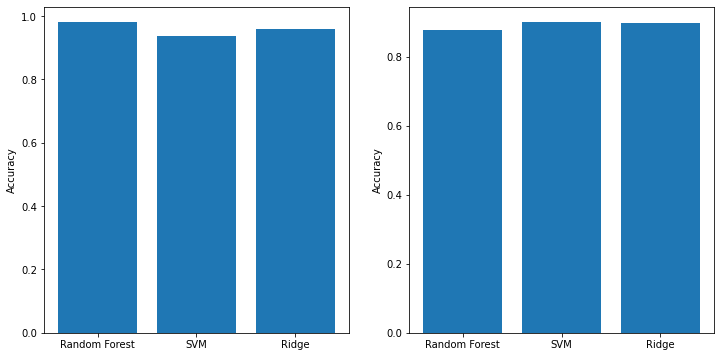

In [13]:
# Print the training and validation scores

print("Training score random forest: ", trainAcc[0])
print("Validation score random forest: ", testAcc[0])

print("Training score SVM: ", trainAcc[1])
print("Validation score SVM: ", testAcc[1])

print("Training score Ridge: ", trainAcc[2])
print("Validation score Ridge: ", testAcc[2])

methods = ['Random Forest', 'SVM', 'Ridge']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax1.set_ylabel('Accuracy')

ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)
ax2.set_ylabel('Accuracy')

### Hyperparameter Tuning

In [14]:
max_depth = [3, 4, 5, 10, 15, 20, 25, 30, 35, 30, 45, 50];
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50];
alpha = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50];
RFRtrainAcc = []
RFRtestAcc = []
SVMtrainAcc = []
SVMtestAcc = []
RidgetrainAcc = []
RidgetestAcc = []

#Random Forest
for param in max_depth:
    RFR_tuner = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(max_depth = param,random_state=24))
    ])
    RFR_tuner.fit(X_train, Y_train)
    Y_pred_train = RFR_tuner.predict(X_train)
    Y_pred_valid = RFR_tuner.predict(X_validation)
    validation_score = RFR_tuner.score(X_validation, Y_validation)
    train_score = RFR_tuner.score(X_train, Y_train)
    RFRtestAcc.append(validation_score)
    RFRtrainAcc.append(train_score)

# Support Vector Machine
for param in C:
    SVM_tuner = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', svm.SVR(C=param,kernel='rbf',gamma='auto'))
    ])
    SVM_tuner.fit(X_train, Y_train)
    Y_predTrain = SVM_tuner.predict(X_train)
    Y_predTest = SVM_tuner.predict(X_test)
    validation_score = SVM_tuner.score(X_validation, Y_validation)
    train_score = SVM_tuner.score(X_train, Y_train)
    SVMtestAcc.append(validation_score)
    SVMtrainAcc.append(train_score)

# Support Vector Machine
for param in alpha:
    Ridge_tuner = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=param))
    ])
    Ridge_tuner.fit(X_train, Y_train)
    Y_predTrain = Ridge_tuner.predict(X_train)
    Y_predTest = Ridge_tuner.predict(X_test)
    validation_score = Ridge_tuner.score(X_validation, Y_validation)
    train_score = Ridge_tuner.score(X_train, Y_train)
    RidgetestAcc.append(validation_score)
    RidgetrainAcc.append(train_score)


### Results After Tuning

Random Forrest Regression maximum accuracy: 0.8793033118574999
Support Vector Machine maximum accuracy: 0.9029459744419676
Ridge Regression maximum accuracy: 0.9105407041901428


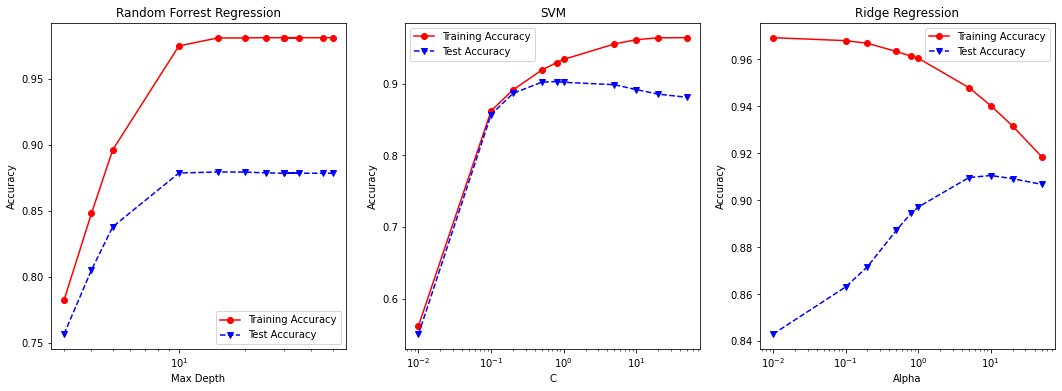

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
ax1.plot(max_depth, RFRtrainAcc, 'ro-', max_depth, RFRtestAcc,'bv--')
ax1.legend(['Training Accuracy','Test Accuracy'])
ax1.set_title("Random Forrest Regression")
ax1.set_xlabel('Max Depth')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy')

ax2.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
ax2.legend(['Training Accuracy','Test Accuracy'])
ax2.set_title("SVM")
ax2.set_xlabel('C')
ax2.set_xscale('log')
ax2.set_ylabel('Accuracy')

ax3.plot(alpha, RidgetrainAcc, 'ro-', alpha, RidgetestAcc,'bv--')
ax3.legend(['Training Accuracy','Test Accuracy'])
ax3.set_title("Ridge Regression")
ax3.set_xlabel('Alpha')
ax3.set_xscale('log')
ax3.set_ylabel('Accuracy')

print('Random Forrest Regression maximum accuracy:', max(RFRtestAcc))
print('Support Vector Machine maximum accuracy:', max(SVMtestAcc))
print('Ridge Regression maximum accuracy:', max(RidgetestAcc))

### Predict Housing Prices with Test Data

In [16]:
# Using the best performing model:
test_pred = np.exp(Ridge_tuner.predict(X_test))

In [17]:
pricePrediction = pd.DataFrame(test_id)
pricePrediction['SalePrice'] = test_pred.round()
pricePrediction

,Id,SalePrice
0,1461,113032.0
1,1462,151798.0
2,1463,174614.0
3,1464,201441.0
4,1465,194647.0
...,...,...
1454,2915,85538.0
1455,2916,86063.0
1456,2917,169012.0
1457,2918,111665.0
